In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
!pip install scikit_learn

In [ ]:
!pip install torch==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.


In [ ]:
!pip install nvidia-ml-py3

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=db9e150b6d46a94e09d5c60c460422f5258edb334cbd92f63db0637eb14c9b4f
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PatchTSTbat/PatchTST_supervised
!ls

/content/drive/MyDrive/PatchTSTbat/PatchTST_supervised
24.pdf	     720_415.pdf  checkpoints	 Formers  models	    result.txt	    test_results
720_192.pdf  720_48.pdf   data.csv	 layers   MSE.pdf	    run_longExp.py  utils
720_24.pdf   720_96.pdf   data_provider  logs	  requirements.txt  scripts
720_336.pdf  Battery.sh   exp		 MAE.pdf  results	    test.pdf


In [ ]:
!sh /content/drive/MyDrive/PatchTSTbat/PatchTST_supervised/Battery.sh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


preds = np.load('/content/drive/MyDrive/PatchTSTbat/PatchTST_supervised/results/24_24_PatchTST_custom_ftM_sl24_ll24_pl24_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0/pred.npy') # Predicted parameters
trues = np.load('/content/drive/MyDrive/PatchTSTbat/PatchTST_supervised/results/24_24_PatchTST_custom_ftM_sl24_ll24_pl24_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0/true.npy') # Ground truth parameters

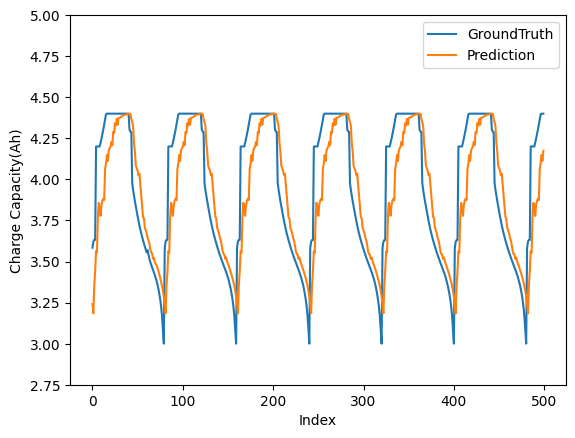

In [ ]:
plt.figure()
# The below range plots the last 500 data points to get the whole plot use trues[:,1,-1] and preds[:,1,-1]
plt.plot(trues[-500:,1,-1], label='GroundTruth')
plt.plot(preds[-500:,1,-1], label='Prediction')
plt.ylim(2.75,5)
plt.xlabel("Index")
plt.ylabel("Charge Capacity(Ah)")
#plt.yticks([2.5,3,3.5,4,4.5,5]) # Y-axis markings (can be varied depending on the requirement)
plt.legend(loc='upper right')
plt.savefig("24.pdf", dpi=300, bbox_inches='tight')
plt.show()

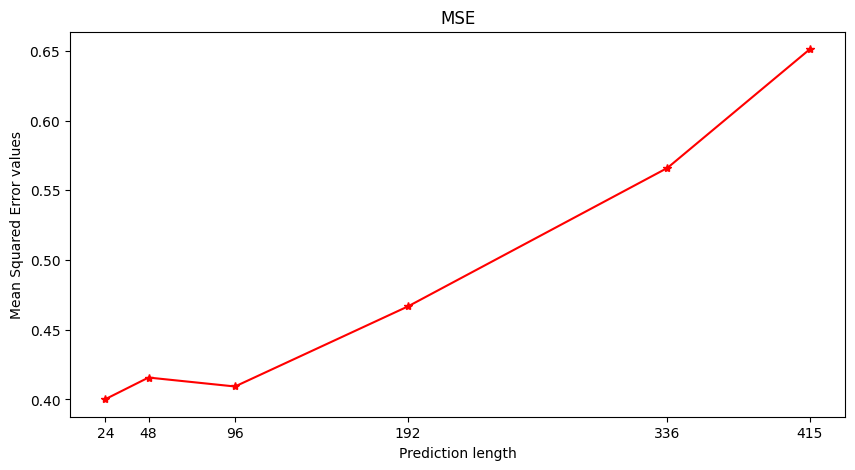

In [ ]:
horizon=[24,48,96,192,336,415]
MSE=[0.400136,0.415688,0.409272,0.466732,0.566084,0.651236]
plt.figure(figsize=(10,5))
plt.plot(horizon,MSE,marker="*",color="r")
plt.xlabel("Prediction length")
plt.ylabel("Mean Squared Error values")
plt.xticks([24,48,96,192,336,415])
plt.title("MSE")
plt.savefig("MSE.pdf",dpi=300)
plt.show()

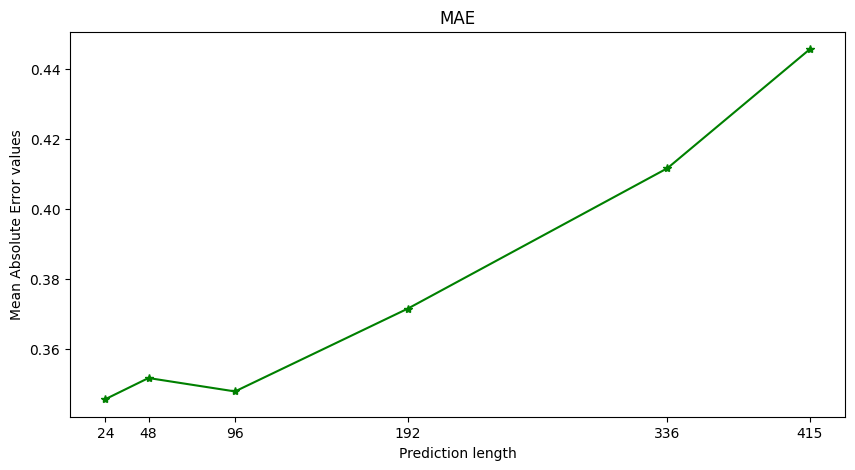

In [ ]:
horizon=[24,48,96,192,336,415]
MAE=[0.345736,0.351784,0.347957,0.371612,0.411652,0.445597]
plt.figure(figsize=(10,5))
plt.plot(horizon,MAE,marker="*",color="g")
plt.xlabel("Prediction length")
plt.ylabel("Mean Absolute Error values")
plt.xticks([24,48,96,192,336,415])
plt.title("MAE")
plt.savefig("MAE.pdf",dpi=300)
plt.show()